# NATURAL LANGUAGE PROCESSING

## PART 1: INTRODUCTION
*Adapted from [NLP Crash Course](http://files.meetup.com/7616132/DC-NLP-2013-09%20Charlie%20Greenbacker.pdf) by Charlie Greenbacker and [Introduction to NLP](http://spark-public.s3.amazonaws.com/nlp/slides/intro.pdf) by Dan Jurafsky*

## What is NLP?
- Using computers to process (analyze, understand, generate) natural human languages

## Why is NLP useful?
- Most knowledge created by humans is unstructured text
- Need some way to make sense of it
- Enables quantitative analysis of text data

## What are some of the higher level task areas?
- **Speech recognition and generation**: Apple Siri
    - Speech to text
    - Text to speech
- **Question answering**: IBM Watson
    - Match query with knowledge base
    - Reasoning about intent of question
- **Machine translation**: Google Translate
    - One language to another to another
- **Information retrieval**: Google
    - Finding relevant results
    - Finding similar results
- **Information extraction**: Gmail
    - Structured information from unstructured documents
- **Assistive technologies**: Google autocompletion
    - Predictive text input
    - Text simplification
- **Natural Language Generation**: computer-generated articles
    - Generating text from data
- **Automatic summarization**: Google News
    - Extractive summarization
    - Abstractive summarization
- **Sentiment analysis**: Twitter analysis
    - Attitude of speaker

## What are some of the lower level components?
- **Tokenization**: breaking text into tokens (words, sentences, n-grams)
- **Stopword removal**: a/an/the
- **Stemming and lemmatization**: root word
- **TF-IDF**: word importance
- **Part-of-speech tagging**: noun/verb/adjective
- **Named entity recognition**: person/organization/location
- **Spelling correction**: "New Yrok City"
- **Word sense disambiguation**: "buy a mouse"
- **Segmentation**: "New York City subway"
- **Language detection**: "translate this page"
- **Machine learning**

## Why is NLP hard?
- **Ambiguity**:
    - Teacher Strikes Idle Kids
    - Red Tape Holds Up New Bridges
    - Hospitals are Sued by 7 Foot Doctors
    - Juvenile Court to Try Shooting Defendant
    - Local High School Dropouts Cut in Half
- **Non-standard English**: tweets/text messages
- **Idioms**: "throw in the towel"
- **Newly coined words**: "retweet"
- **Tricky entity names**: "Where is A Bug's Life playing?"
- **World knowledge**: "Mary and Sue are sisters", "Mary and Sue are mothers"

## How does NLP work?
- Build probabilistic model using data about a language
- Requires an understanding of the language
- Requires an understanding of the world (or a particular domain)


## PART 2: READING IN THE YELP REVIEWS

- "corpus" = collection of documents
- "corpora" = plural form of corpus

### Sentiment Analysis of Yelp Reviews

IS sentiment postive or negative?
Can we predict star ratings?

In [1]:
## PRE-REQUISITES (Install the following from the Terminal)
## pip install textblob
## python -m textblob.download_corpora

In [2]:
 # ! pip install textblob

In [3]:
# ! python -m textblob.download_corpora -y

[TextBlob](https://textblob.readthedocs.io/en/dev/) is a Python library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

[Natural Language Toolkit](https://www.nltk.org/) (nltk) is a leading platform for building Python programs to work with human language data. 

In [4]:
# Data manipulation
import pandas as pd
import numpy as np

# handling of sparse matrix
import scipy as sp

# Data Visualization
import seaborn as sns

# ML Models
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# text analytics/NLP toolkits
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

In [5]:
import sys

# Check for python version
req_version = (2,5)
cur_version = sys.version_info
cur_version

sys.version_info(major=3, minor=11, micro=5, releaselevel='final', serial=0)

In [6]:
# Read yelp.csv into a DataFrame
df_yelp = pd.read_csv('yelp.csv')
print(df_yelp.shape)
df_yelp.head()

(10000, 10)


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [7]:
df_yelp.stars.value_counts()
# univariate descriptive stats
# int not float
# is the data balanced? way more pos reviews compared to neg.

stars
4    3526
5    3337
3    1461
2     927
1     749
Name: count, dtype: int64

#### We want to look  at promoters (5) and detractors (1)

In [8]:
# Create a new DataFrame that only contains the 5-star and 1-star reviews
df_yelp_best_worst = df_yelp[(df_yelp.stars==5) | (df_yelp.stars==1)]
print(df_yelp_best_worst.shape)
df_yelp_best_worst.sample(5)

(4086, 10)


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9483,ytpmoIty7loFB8kRYRtJHw,2012-10-11,8tE5X1kaUrZRLlWYA7KM4g,5,Grew up in San Antonio and Austin. Have travel...,review,RCDhIFQlSth-gQkojdN13w,0,0,1
4596,7Z-1mLIoxCHUxCp54W1CGQ,2010-07-27,9ipDNTQDEetRIs5x0f1v4A,5,Enjoyed date night here with the hubby. Try th...,review,yOSz69afsE04ilUfAckLaA,0,0,0
7078,hfl62LX14YqNpG0g0Tj6_Q,2010-09-26,xNz9-XB-2Hy6rtPrQXkNBw,5,Fuego Bistro is one of my new favorites! A cou...,review,oy6fdscGSXY2gzRqF9pZxg,4,3,2
3982,iJPG0GPcIirjOMlmzZWxBQ,2012-02-07,W2ni9HfUWDDELNjp0UPrGw,5,Heard about this restaurant from a friend and ...,review,DPVfcERMYkzf10rd_ySr9Q,0,0,0
5570,Ch_2Ye0w4Q9l3VeVW7VNHA,2011-04-17,bLd715CpGVR07-X8mM8-yA,5,This place has been here 7 years and we have n...,review,7W4egS-WyR0hRHMfQtPEOQ,1,1,1


In [9]:
df_yelp_best_worst.stars.value_counts()

stars
5    3337
1     749
Name: count, dtype: int64

#### Can we predict the stars using what is in the text column?

In [10]:
# Split the new DataFrame into training and testing sets.  Default test_size=.25
X_train, X_test, y_train, y_test = train_test_split(df_yelp_best_worst.text, df_yelp_best_worst.stars, random_state=1)

In [11]:
print(X_train.shape)
X_train.head()
# series showing text column

(3064,)


6841    FILLY-B's!!!!!  only 8 reviews?? NINE now!!!\r...
1728    My husband and I absolutely LOVE this restaura...
3853    We went today after lunch. I got my usual of l...
671     Totally dissapointed.  I had purchased a coupo...
4920    Costco Travel - My husband and I recently retu...
Name: text, dtype: object

In [12]:
print(y_train.shape)
y_train.head()
# series showing star ratings

(3064,)


6841    5
1728    5
3853    5
671     1
4920    5
Name: stars, dtype: int64

In [13]:
print(X_test.shape)
X_test.head()

(1022,)


3922    Looking a cutting edge, wanting the best for e...
8379    Greatness in the form of food, just like the o...
4266    The Flower Studio far exceeded my expectations...
5577        So yummy! Strange combination but great place
537     I've been hearing about these cheesecakes from...
Name: text, dtype: object

In [14]:
print(y_test.shape)
y_test.head()

(1022,)


3922    5
8379    5
4266    5
5577    5
537     5
Name: stars, dtype: int64

## PART 3: TOKENIZATION
- **What:** Separate text into units such as sentences or words
- **Why:** Gives structure to previously unstructured text
- **Notes:** Relatively easy with English language text, not easy with some languages

In [15]:
# Use CountVectorizer to create document-term matrices from X_train and X_test 
# i.e., convert a collection of text documents to a matrix of token counts

# instantiate the object
vect = CountVectorizer()

# Vectorize the data
# fit transform train
# only transform test
train_dtm = vect.fit_transform(X_train)  # learn the vocabulary dictionary and return document-term matrix
test_dtm = vect.transform(X_test)        # transform to document-term matrix based on the vocabulary learned during the fitting

In [16]:
vect

CountVectorizer()

In [17]:
# rows are documents, columns are terms (aka "tokens" or "features")
# now we have a document term matrix or sparse term matrix
# (x,x) rows and how many words are in those rows
train_dtm.shape

(3064, 16825)

In [18]:
train_dtm

<3064x16825 sparse matrix of type '<class 'numpy.int64'>'
	with 237720 stored elements in Compressed Sparse Row format>

In [19]:
# Last 50 features

print(vect.get_feature_names_out()[-50:])


['yyyyy' 'z11' 'za' 'zabba' 'zach' 'zam' 'zanella' 'zankou' 'zappos'
 'zatsiki' 'zen' 'zero' 'zest' 'zexperience' 'zha' 'zhou' 'zia'
 'zihuatenejo' 'zilch' 'zin' 'zinburger' 'zinburgergeist' 'zinc'
 'zinfandel' 'zing' 'zip' 'zipcar' 'zipper' 'zippers' 'zipps' 'ziti' 'zoe'
 'zombi' 'zombies' 'zone' 'zones' 'zoning' 'zoo' 'zoyo' 'zucca' 'zucchini'
 'zuchinni' 'zumba' 'zupa' 'zuzu' 'zwiebel' 'zzed' 'éclairs' 'école' 'ém']


> these are all 1 n-grams becuase we used count vectorizer

In [20]:
# Show vectorizer attributes
list(vect.vocabulary_.items())[-50:]

[('reschedule', 12358),
 ('retire', 12437),
 ('protégé', 11702),
 ('horatio', 7344),
 ('hernandez', 7154),
 ('battle', 1508),
 ('microbrews', 9462),
 ('gaeta', 6302),
 ('explosion', 5473),
 ('adams', 456),
 ('curiosity', 3915),
 ('unison', 15760),
 ('stalked', 14124),
 ('evaluative', 5324),
 ('topic', 15294),
 ('15pm', 66),
 ('mesmerized', 9413),
 ('fairy', 5560),
 ('youki', 16728),
 ('cleansers', 3065),
 ('toners', 15271),
 ('dusting', 4896),
 ('powders', 11428),
 ('demo', 4257),
 ('snowfairy', 13736),
 ('saddens', 12766),
 ('oahu', 10228),
 ('anemic', 812),
 ('uk', 15626),
 ('chefing', 2829),
 ('aliens', 675),
 ('uncrumbled', 15680),
 ('misunderstanding', 9595),
 ('specialtly', 13944),
 ('washer', 16259),
 ('idiotic', 7530),
 ('incorrectly', 7663),
 ('divers', 4614),
 ('patrol', 10817),
 ('vandalized', 15945),
 ('infestations', 7719),
 ('violation', 16093),
 ('lease', 8561),
 ('potholes', 11411),
 ('shocks', 13343),
 ('insulation', 7823),
 ('freezing', 6139),
 ('fitted', 5841),
 ('wa

**[CountVectorizer documentation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)**
- **lowercase:** boolean, True by default
- Convert all characters to lowercase before tokenizing.

In [21]:
# Don't convert to lowercase
# instantiate new object with lowercase = false
# The and the are two different words now
# leaving the default lowercase=true is better for handling this
# you dont want more dimensions if you dont need them
vect = CountVectorizer(lowercase=False)
train_dtm = vect.fit_transform(X_train)  # learn the vocabulary dictionary and return document-term matrix
train_dtm.shape

(3064, 20838)

In [22]:
# Show vectorizer attributes
list(vect.vocabulary_.items())[-50:]

[('15pm', 68),
 ('MESMERIZED', 3903),
 ('Fairy', 2420),
 ('Youki', 7055),
 ('Peel', 4860),
 ('cleansers', 9337),
 ('toners', 19554),
 ('dusting', 10935),
 ('powders', 16237),
 ('demo', 10385),
 ('Fluff', 2547),
 ('Puff', 5103),
 ('SnowFairy', 5875),
 ('Shower', 5793),
 ('saddens', 17393),
 ('Oahu', 4570),
 ('anemic', 7510),
 ('UK', 6571),
 ('Fajita', 2422),
 ('chefing', 9149),
 ('Agent', 452),
 ('Sands', 5616),
 ('aliens', 7402),
 ('uncrumbled', 19893),
 ('misunderstanding', 14750),
 ('specialtly', 18401),
 ('pizzookie', 16017),
 ('Props', 5092),
 ('Washer', 6842),
 ('idiotic', 13167),
 ('Forms', 2581),
 ('incorrectly', 13284),
 ('Trash', 6492),
 ('divers', 10706),
 ('patrol', 15725),
 ('Vandalized', 6680),
 ('MURDER', 3939),
 ('Bug', 1154),
 ('infestations', 13333),
 ('violation', 20243),
 ('lease', 13942),
 ('potholes', 16222),
 ('shocks', 17867),
 ('insulation', 13430),
 ('Freezing', 2615),
 ('fitted', 11764),
 ('Leaf', 3735),
 ('Recommendation', 5263),
 ('Waaaaaay', 6806),
 ('gover

- **token_pattern:** string
- Regular expression denoting what constitutes a "token". The default regexp select tokens of 2 or more alphanumeric characters (punctuation is completely ignored and always treated as a token separator).

[Python regular expression operations](https://docs.python.org/3/library/re.html)

In [23]:
# Allow tokens of one character
# intatiate a new object
vect = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
train_dtm = vect.fit_transform(X_train)
train_dtm.shape

(3064, 16861)

In [24]:
print(vect.get_feature_names_out()[-50:])

['z' 'z11' 'za' 'zabba' 'zach' 'zam' 'zanella' 'zankou' 'zappos' 'zatsiki'
 'zen' 'zero' 'zest' 'zexperience' 'zha' 'zhou' 'zia' 'zihuatenejo'
 'zilch' 'zin' 'zinburger' 'zinburgergeist' 'zinc' 'zinfandel' 'zing'
 'zip' 'zipcar' 'zipper' 'zippers' 'zipps' 'ziti' 'zoe' 'zombi' 'zombies'
 'zone' 'zones' 'zoning' 'zoo' 'zoyo' 'zucca' 'zucchini' 'zuchinni'
 'zumba' 'zupa' 'zuzu' 'zwiebel' 'zzed' 'éclairs' 'école' 'ém']


In [25]:
# Show vectorizer attributes
list(vect.vocabulary_.items())[0:50:]

[('filly', 5789),
 ('b', 1309),
 ('s', 12785),
 ('only', 10387),
 ('8', 292),
 ('reviews', 12493),
 ('nine', 10093),
 ('now', 10204),
 ('wow', 16645),
 ('do', 4645),
 ('i', 7519),
 ('miss', 9601),
 ('this', 15123),
 ('place', 11212),
 ('24hrs', 139),
 ('drive', 4823),
 ('thru', 15166),
 ('or', 10438),
 ('walk', 16228),
 ('up', 15865),
 ('ridiculously', 12542),
 ('cheap', 2802),
 ('tasty', 14868),
 ('of', 10311),
 ('course', 3692),
 ('the', 15062),
 ('arizona', 1029),
 ('burritos', 2298),
 ('are', 1014),
 ('good', 6588),
 ('everything', 5357),
 ('is', 7975),
 ('used', 15916),
 ('to', 15258),
 ('love', 8921),
 ('one', 10379),
 ('combos', 3246),
 ('you', 16762),
 ('get', 6450),
 ('a', 333),
 ('beef', 1576),
 ('burrito', 2297),
 ('taco', 14750),
 ('rice', 12517),
 ('and', 816),
 ('beans', 1540),
 ('for', 6044),
 ('under', 15714),
 ('6', 256),
 ('color', 3226)]

- **ngram_range:** tuple (min_n, max_n)
- The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

[An Introduction to N-grams: What Are They and Why Do We Need Them?](https://blog.xrds.acm.org/2017/10/introduction-n-grams-need/)

In [26]:
# Include 1-grams and 2-grams
# manipulate parameters to increase or decrease features
vect = CountVectorizer(ngram_range=(1, 2))
train_dtm = vect.fit_transform(X_train)
train_dtm.shape  # number of features increases from 16,861 to 169,847

(3064, 169847)

In [27]:
print(vect.get_feature_names_out()[-50:])

['zone out' 'zone when' 'zones' 'zones dolls' 'zoning' 'zoning issues'
 'zoo' 'zoo and' 'zoo is' 'zoo not' 'zoo the' 'zoo ve' 'zoyo' 'zoyo for'
 'zucca' 'zucca appetizer' 'zucchini' 'zucchini and' 'zucchini bread'
 'zucchini broccoli' 'zucchini carrots' 'zucchini fries' 'zucchini pieces'
 'zucchini strips' 'zucchini veal' 'zucchini very' 'zucchini with'
 'zuchinni' 'zuchinni again' 'zuchinni the' 'zumba' 'zumba class'
 'zumba or' 'zumba yogalates' 'zupa' 'zupa flavors' 'zuzu' 'zuzu in'
 'zuzu is' 'zuzu the' 'zwiebel' 'zwiebel kräuter' 'zzed' 'zzed in'
 'éclairs' 'éclairs napoleons' 'école' 'école lenôtre' 'ém' 'ém all']


In [28]:
# Show vectorizer attributes
list(vect.vocabulary_.items())[0:50:]

[('filly', 51749),
 ('only', 101633),
 ('reviews', 119034),
 ('nine', 95452),
 ('now', 97181),
 ('wow', 167344),
 ('do', 41612),
 ('miss', 89971),
 ('this', 146924),
 ('place', 109900),
 ('24hrs', 938),
 ('drive', 43612),
 ('thru', 148108),
 ('or', 102359),
 ('walk', 158386),
 ('up', 154936),
 ('ridiculously', 119420),
 ('cheap', 28586),
 ('tasty', 138152),
 ('of', 97815),
 ('course', 34958),
 ('the', 140452),
 ('arizona', 12397),
 ('burritos', 24225),
 ('are', 11529),
 ('good', 60362),
 ('everything', 47889),
 ('is', 74210),
 ('used', 155788),
 ('to', 148972),
 ('love', 84314),
 ('one', 101149),
 ('combos', 32102),
 ('you', 168436),
 ('get', 58690),
 ('beef', 18342),
 ('burrito', 24175),
 ('taco', 137134),
 ('rice', 119204),
 ('and', 6933),
 ('beans', 17857),
 ('for', 54092),
 ('under', 154273),
 ('color', 31922),
 ('me', 87320),
 ('silly', 127345),
 ('call', 25868),
 ('sally', 121414),
 ('they', 146093),
 ('have', 65231)]

In [29]:
# Show vectorizer attributes
list(vect.vocabulary_.items())[-50:]

[('for students', 54951),
 ('students and', 134825),
 ('and im', 8272),
 ('its quarter', 76662),
 ('quarter more', 114644),
 ('less dollars', 81068),
 ('dollars half', 42246),
 ('cream cookie', 35585),
 ('cookie sandwiches', 33910),
 ('sandwiches trust', 122039),
 ('its enough', 76588),
 ('enough its', 46312),
 ('mill cookies', 89437),
 ('made their', 85313),
 ('their along', 144439),
 ('have italian', 65518),
 ('ice place', 70870),
 ('fresh cookies', 56037),
 ('cookies recommendation', 33940),
 ('recommendation if', 116972),
 ('love cookies', 84362),
 ('cookies made', 33936),
 ('into sandwiches', 73900),
 ('great lil', 61919),
 ('lil joint', 82178),
 ('joint gotta', 77391),
 ('gotta get', 61223),
 ('the guac', 142040),
 ('guac staff', 62806),
 ('awesome way', 15318),
 ('way cozy', 160717),
 ('waaaaaay', 157984),
 ('government', 61287),
 ('had enchiladas', 63505),
 ('and taco', 9572),
 ('taco just', 137152),
 ('chance this', 28213),
 ('had waaaaaay', 63917),
 ('waaaaaay too', 157985),


In [30]:
sw = ['in', 'on', 'the']
vect = CountVectorizer(ngram_range=(1, 2), stop_words="english" )
train_dtm = vect.fit_transform(X_train)
train_dtm.shape  # number of features decreases from 169,847 to 150,034

(3064, 150034)

In [31]:
vect.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [32]:
# Last 50 features
print(vect.get_feature_names_out()[-50:])

['zone evening' 'zones' 'zones dolls' 'zoning' 'zoning issues' 'zoo'
 'zoo animals' 'zoo complains' 'zoo larger' 'zoo lot' 'zoo ve' 'zoyo'
 'zoyo months' 'zucca' 'zucca appetizer' 'zucchini' 'zucchini bread'
 'zucchini broccoli' 'zucchini carrots' 'zucchini eggplant'
 'zucchini figure' 'zucchini fries' 'zucchini good' 'zucchini noodles'
 'zucchini pieces' 'zucchini strips' 'zucchini veal' 'zuchinni'
 'zuchinni sampler' 'zuchinni suggestion' 'zumba' 'zumba class'
 'zumba cycling' 'zumba yogalates' 'zupa' 'zupa flavors' 'zuzu'
 'zuzu downtown' 'zuzu far' 'zuzu ultimate' 'zwiebel' 'zwiebel kräuter'
 'zzed' 'zzed pants' 'éclairs' 'éclairs napoleons' 'école' 'école lenôtre'
 'ém' 'ém huge']


### `PREDICTING THE STAR RATING`

In [33]:
# Use default options for CountVectorizer.  
# Here, we're splitting the fit and transform operations up for both X_train and X_test
vect = CountVectorizer()
vect.fit(X_train)

# Create document-term matrices. In this case, we are transforming X_test tokens to fit the vocabulary generated by X_train
train_dtm = vect.transform(X_train)
test_dtm = vect.transform(X_test)

In [34]:
print(train_dtm.shape)
print(test_dtm.shape)

(3064, 16825)
(1022, 16825)


##### NOTE: Fit to train and then use transform on test. never fit to test. 

In [35]:
# You get different set of words counts when you fit and transform train and test sets separately
train_vect = CountVectorizer()
train_vect.fit(X_train)# learning the vocabulary, assigning an index, tokenize it
train_dtm2 = train_vect.transform(X_train) # transforming new tokens into my DTM and convert to numeric vector
print(train_dtm2.shape)

# NOTE: NEVER FIT ON THE TEST ONLY FIT TO THE TRAIN
test_vect = CountVectorizer()
test_vect.fit(X_test) # never do this in the real world
test_dtm2 = test_vect.transform(X_test)
print(test_dtm2.shape)
# this is a common mistake. Always fit to train, do not fit on test.
# this made a different dictionary and seccond model

(3064, 16825)
(1022, 9620)


Logistic Regression is a Generalized linear model that is part of a larger group of models that are called discriminative learning algorithms.  Using a binary classification for an example, it uses something called Gradient Descent to searches for a boundary between the classes.  Malignant vs Benign

Naive Bayes is a Generative Learning Algorithm.  It looks at the classes one at a time.  First it will look at all the malignant tumors and try to build a model for what malignant tumors look like.  Then it will look at all the benign tumors in isolation.  So rather than looking at both classes simulaneously and attempting to separate them, a generative learning algorithm instead builds a model of what each of the classes look like, almost in isolation.  And then at test time, it evaluates a new example against each model, and attempts to see which of the two models it matches more closely against.

In [36]:
"""
What are Generative algorithims?

Discriminative  vs generative:
Discriminative : K nearest neighbor, logistic regression.
Discriminative : Supervised learning. it discriminates against two or more things. 
Generative: can be supervised or unsupervised. Tries to understand the data points for the one class. Then moves on to the next class. Its doing something different with the data compared to discriminative. Its building models for each class then comparing them. Unsupervised ML uses unlabled data so it needs to build a model for each class. 

NLP uses Naive Bays a lot when the problem is Classificaion with Discrete features.
"""

'\nWhat are Generative algorithims?\n\nDiscriminative  vs generative:\nDiscriminative : K nearest neighbor, logistic regression.\nDiscriminative : Supervised learning. it discriminates against two or more things. \nGenerative: can be supervised or unsupervised. Tries to understand the data points for the one class. Then moves on to the next class. Its doing something different with the data compared to discriminative. Its building models for each class then comparing them. Unsupervised ML uses unlabled data so it needs to build a model for each class. \n\nNLP uses Naive Bays a lot when the problem is Classificaion with Discrete features.\n'

In [37]:
# Use Naive Bayes to predict the star rating.  The Naive Bayes classifier is used for classification with discrete features 
# (e.g., word counts for text classification)
nb = MultinomialNB()
nb.fit(train_dtm, y_train)
y_pred = nb.predict(test_dtm) # these are the predicted y for the test. its a prediction
# the model has not seen the test yet, it is is guessing.

In [38]:
display(X_train)
vect.get_feature_names_out()[-50:]

6841    FILLY-B's!!!!!  only 8 reviews?? NINE now!!!\r...
1728    My husband and I absolutely LOVE this restaura...
3853    We went today after lunch. I got my usual of l...
671     Totally dissapointed.  I had purchased a coupo...
4920    Costco Travel - My husband and I recently retu...
                              ...                        
9396    Pros: \r\n-No breed restrictions on dogs\r\n-W...
2661    Sorry Banana Leaf... I'm usually not picky at ...
9756    Alright this is the deal of deals, 2.75 for st...
554     Hands down a great lil joint! Gotta get the gu...
2575    Absolutely disgusting.  I had enchiladas and a...
Name: text, Length: 3064, dtype: object

array(['yyyyy', 'z11', 'za', 'zabba', 'zach', 'zam', 'zanella', 'zankou',
       'zappos', 'zatsiki', 'zen', 'zero', 'zest', 'zexperience', 'zha',
       'zhou', 'zia', 'zihuatenejo', 'zilch', 'zin', 'zinburger',
       'zinburgergeist', 'zinc', 'zinfandel', 'zing', 'zip', 'zipcar',
       'zipper', 'zippers', 'zipps', 'ziti', 'zoe', 'zombi', 'zombies',
       'zone', 'zones', 'zoning', 'zoo', 'zoyo', 'zucca', 'zucchini',
       'zuchinni', 'zumba', 'zupa', 'zuzu', 'zwiebel', 'zzed', 'éclairs',
       'école', 'ém'], dtype=object)

In [39]:
y_test # these are the acutals, we compare this to what was predicted.

3922    5
8379    5
4266    5
5577    5
537     5
       ..
6846    5
1588    5
8451    5
7903    5
8255    5
Name: stars, Length: 1022, dtype: int64

In [40]:
# Calculate accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.9187866927592955


In [41]:
# Calculate null accuracy:  accuracy that could be achieved by always predicting the most frequent class
# We must always compare with this in a classification experiment
# Null accuracy is baseline. you use the mode/dominate class.
# if you where to just guess 5 everytime you would be right 82 percent of the time.
# for the model to be viable, it just need to beat baseline.
y_test_binary = np.where(y_test==5, 1, 0) # boolean mask to calculate the odds of just picking 5 over and over again
y_test_binary.mean()

0.8199608610567515

In [42]:
# Define a function that accepts a vectorizer and returns the accuracy
def tokenize_test(vect, X_train, y_train, X_test, y_test):
    train_dtm = vect.fit_transform(X_train)  # learn the vocabulary dictionary and return document-term matrix
    print(f'Features: {train_dtm.shape[1]:,}')
    test_dtm = vect.transform(X_test)        # transform to document-term matrix based on vocabulary learned during the fitting
    nb = MultinomialNB()                     # instantiate the Naive Bayes classifier for multinomial models
    nb.fit(train_dtm, y_train)               # fit the Naive Bayes classifier according to X, y
    y_pred = nb.predict(test_dtm)            # perform classification on an array of test vectors X

    # Calculate the accuracy by comparing the predictions (y_pred) with the ground truth (y_test)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

In [43]:
# Only include 1-grams, 2-grams, and 3-grams
vect = CountVectorizer(ngram_range=(1, 3))
tokenize_test(vect, X_train, y_train, X_test, y_test)
# now we have way more features
# now we have a worse accuracy
# 10k reviews, 3-grams, not a lot of context in 3-grams. 
# often people use 2 grams becuase we can get more out of 2. 2 grams provides the context that we want.
# rarely use 1 gram because its not enough context.
# curse of dimensionality, more features doesn't mean better scores.
# we are trying to find meaningful words for our sentimate analysis.

Features: 456,398
Accuracy:  0.8356164383561644


In [44]:
vect.get_feature_names_out()[-50:]
# we do the last 50 becuase there are a bunch of numbers in the front end. 

array(['zucchini carrots and', 'zucchini fries', 'zucchini fries are',
       'zucchini pieces', 'zucchini pieces amongst', 'zucchini strips',
       'zucchini strips appetizer', 'zucchini veal', 'zucchini veal demi',
       'zucchini very', 'zucchini very good', 'zucchini with',
       'zucchini with some', 'zuchinni', 'zuchinni again',
       'zuchinni again on', 'zuchinni the', 'zuchinni the sampler',
       'zumba', 'zumba class', 'zumba class and', 'zumba or',
       'zumba or cycling', 'zumba yogalates', 'zumba yogalates boot',
       'zupa', 'zupa flavors', 'zupa flavors are', 'zuzu', 'zuzu in',
       'zuzu in downtown', 'zuzu is', 'zuzu is at', 'zuzu the',
       'zuzu the ultimate', 'zwiebel', 'zwiebel kräuter',
       'zwiebel kräuter salat', 'zzed', 'zzed in', 'zzed in my',
       'éclairs', 'éclairs napoleons', 'éclairs napoleons and', 'école',
       'école lenôtre', 'école lenôtre trained', 'ém', 'ém all',
       'ém all they'], dtype=object)

## PART 4: STOPWORD REMOVAL
- **What:** Remove common words that will likely appear in any text
- **Why:** They don't tell you much about your text

In [45]:
# Show vectorizer options/parameters
vect

CountVectorizer(ngram_range=(1, 3))

- **stop_words:** string {'english'}, list, or None (default)
- If 'english', a built-in stop word list for English is used.
- If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
- If None, no stop words will be used. max_df can be set to a value in the range [0.7, 1.0) to automatically detect and filter stop words based on intra corpus document frequency of terms.



In [46]:
# Remove English stop words
vect = CountVectorizer(stop_words='english')
tokenize_test(vect, X_train, y_train, X_test, y_test)

Features: 16,528
Accuracy:  0.9158512720156555


In [47]:
# Set of stop words
print(vect.get_stop_words())

frozenset({'fifteen', 'amoungst', 'cannot', 'whoever', 'your', 'describe', 'two', 'least', 'under', 'even', 'therein', 'against', 'twelve', 'get', 'fill', 'full', 'thick', 'at', 'what', 'her', 'further', 'where', 'nor', 'ourselves', 'or', 'sometime', 'him', 'anything', 'empty', 'that', 'any', 'my', 'for', 'hereafter', 'until', 'cry', 'throughout', 'moreover', 'less', 'give', 'over', 'whatever', 'three', 'yourselves', 'they', 'became', 'everywhere', 'found', 'bottom', 'who', 'either', 'here', 'am', 'can', 'whole', 'amongst', 'thereafter', 'do', 'find', 'about', 'eg', 'itself', 'from', 'others', 'several', 'hasnt', 'when', 'could', 'back', 'something', 'nine', 'anyone', 'please', 'around', 'our', 'nobody', 'too', 'why', 'off', 'without', 'their', 'somewhere', 'above', 'whither', 'after', 'into', 'being', 'will', 'since', 'fifty', 'up', 'bill', 'hereupon', 'co', 'becoming', 'during', 'again', 'whom', 'though', 'which', 'noone', 'this', 'somehow', 'inc', 'ours', 'hence', 'down', 'might', '

## PART 5: OTHER COUNTVECTORIZER OPTIONS 
- **max_features:** int or None, default=None
- If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

In [48]:
# Remove English stop words and only keep 100 features
vect = CountVectorizer(stop_words='english', max_features=100) # only want words that are important
tokenize_test(vect, X_train, y_train, X_test, y_test)
# check the docstring. 100 is the top 100 most FREQ used words.

Features: 100
Accuracy:  0.8698630136986302


In [49]:
# DTM is not a dataframe but we will push it into one so we can observe what it looks like
train_dtm = vect.fit_transform(X_train)
pd.DataFrame(train_dtm.toarray(), columns=vect.get_feature_names_out()).sample(10)

,amazing,area,atmosphere,awesome,bad,bar,best,better,big,came,...,try,ve,wait,want,way,went,wine,work,worth,years
1478,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
343,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
38,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
932,1,2,1,0,0,6,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1021,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1616,0,0,0,0,1,0,2,0,4,0,...,0,1,0,0,0,0,0,1,0,0
1277,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# All 100 features
print(vect.get_feature_names_out())

['amazing' 'area' 'atmosphere' 'awesome' 'bad' 'bar' 'best' 'better' 'big'
 'came' 'cheese' 'chicken' 'clean' 'coffee' 'come' 'day' 'definitely'
 'delicious' 'did' 'didn' 'dinner' 'don' 'eat' 'excellent' 'experience'
 'favorite' 'feel' 'food' 'free' 'fresh' 'friendly' 'friends' 'going'
 'good' 'got' 'great' 'happy' 'home' 'hot' 'hour' 'just' 'know' 'like'
 'little' 'll' 'location' 'long' 'looking' 'lot' 'love' 'lunch' 'make'
 'meal' 'menu' 'minutes' 'need' 'new' 'nice' 'night' 'order' 'ordered'
 'people' 'perfect' 'phoenix' 'pizza' 'place' 'pretty' 'prices' 'really'
 'recommend' 'restaurant' 'right' 'said' 'salad' 'sandwich' 'sauce' 'say'
 'service' 'staff' 'store' 'sure' 'table' 'thing' 'things' 'think' 'time'
 'times' 'took' 'town' 'tried' 'try' 've' 'wait' 'want' 'way' 'went'
 'wine' 'work' 'worth' 'years']


In [51]:
# Only include 1-grams and 2-grams, and limit the number of features to 100,000
# 2 grams captures better context and nuance. sentiment analytics.
vect = CountVectorizer(ngram_range=(1, 2), max_features=100000)
tokenize_test(vect, X_train, y_train, X_test, y_test)

Features: 100,000
Accuracy:  0.8855185909980431


- **min_df:** float in range [0.0, 1.0] or int, default=1
- When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts.

> #### MAX_FEATURES: the most i will let you use based on FREQ.
   > #### MIN_DF: 2 = of the MAX only use terms that appear at least twice.

In [52]:
# Only include 1-grams and 2-grams, and only include terms that appear at least 2 times
vect = CountVectorizer(ngram_range=(1, 2), min_df=2)
tokenize_test(vect, X_train, y_train, X_test, y_test)

Features: 43,957
Accuracy:  0.9324853228962818


In [53]:
# I am doing sentiment analysis where context matters! 
# I am trying to keep context while working with my scores.
vect = CountVectorizer(ngram_range=(1, 2), min_df=2)
train_dtm = vect.fit_transform(X_train)
pd.DataFrame(train_dtm.toarray(), columns=vect.get_feature_names_out()).sample(10)

,00,00 am,00 and,00 did,00 for,00 pm,00 the,00 there,00 was,000,...,zip,zipps,zoe,zoe kitchen,zone,zoo,zucchini,zucchini and,zuchinni,zumba
2083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2170,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Part 6: INTRODUCTION TO TextBlob

* TextBlob: "Simplified Text Processing"

TextBlob is a Python library for processing textual data.  It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.



### Add TextBlob to your toolkit. It can be useful for a lot of different projects.

In [54]:
# Print the first review
print(df_yelp_best_worst.text[0])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [55]:
# Save it as a TextBlob object
review = TextBlob(df_yelp_best_worst.text[0])

In [56]:
import sys
print(sys.executable)


/opt/homebrew/anaconda3/bin/python


In [57]:
# List the words
review.words

WordList(['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excellent', 'The', 'weather', 'was', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'grounds', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'was', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fills', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'was', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'was', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'looks', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', 'eggs', 

In [58]:
len(review.words)

159

In [59]:
# List the sentences
review.sentences

[Sentence("My wife took me here on my birthday for breakfast and it was excellent."),
 Sentence("The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure."),
 Sentence("Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning."),
 Sentence("It looked like the place fills up pretty quickly so the earlier you get here the better."),
 Sentence("Do yourself a favor and get their Bloody Mary."),
 Sentence("It was phenomenal and simply the best I've ever had."),
 Sentence("I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it."),
 Sentence("It was amazing."),
 Sentence("While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious."),
 Sentence("It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete."),
 Sentence("It was the best "toast" I've ever had."),


In [60]:
# some string methods are available
review.lower()

TextBlob("my wife took me here on my birthday for breakfast and it was excellent.  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  our waitress was excellent and our food arrived quickly on the semi-busy saturday morning.  it looked like the place fills up pretty quickly so the earlier you get here the better.

do yourself a favor and get their bloody mary.  it was phenomenal and simply the best i've ever had.  i'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  it was amazing.

while everything on the menu looks excellent, i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  it came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  it was the best "toast" i've ever had.

anyway, i can't wait to go back!")

In [61]:
review.noun_phrases

WordList(['absolute pleasure', 'place fills', 'bloody mary', 'everything', 'white truffle', 'vegetable skillet', 'anyway', "ca n't"])

## PART 7: STEMMING AND LEMMATIZATION

**STEMMING:**
- **What:** Reduce a word to its base/stem/root form
- **Why:** Often makes sense to treat related words the same way
- **Notes:**
    - Uses a "simple" and fast rule-based approach
    - Stemmed words are usually not shown to users (used for analysis/indexing)
    - Some search engines treat words with the same stem as synonyms

In [62]:
# Initialize stemmer
stemmer = SnowballStemmer('english')

In [63]:
# Stem each word
stems = [stemmer.stem(word) for word in review.words]
print(f'There are {len(stems)} stems in review.words\n')
print(f'review.words\n{review.words}\n')
print(f'stems\n{stems}')

There are 159 stems in review.words

review.words
['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excellent', 'The', 'weather', 'was', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'grounds', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'was', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fills', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'was', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'was', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'looks', 'excellent', 'I', 'had', 'the', 

In [64]:
print(len(stems))
print(len(set(stems)))  # the Python set is an unordered collection of unique elements; it removes duplicates from a sequence

159
100


In [65]:
# Define two lists
list1 = [1, 2, 3, 4, 5]
list2 = [3, 4, 5, 6, 7]

# What elements are in list1 but not in list2?
result_1 = set(list1) - set(list2)  # convert lists to sets and perform set subtraction

# What elements are in list2 but not in list1?
result_2 = set(list2) - set(list1)

print(result_1)
result_2

{1, 2}


{6, 7}

**LEMMATIZATION**
- **What:** Derive the canonical form ('lemma') of a word
- **Why:** Can be better than stemming
- **Notes:** Uses a dictionary-based approach (slower than stemming)

## Difference between stemming and lemming:
Stemming would drill down the word "better" to "bet"
Lemming would mean the word "better" and all other simliar words is going to simply mean "good"
P.S. Lemming is more computationally expensive.

In [66]:
# Assume every word is a noun
noun_lemmas = [word.lemmatize() for word in review.words]  # review is a TextBlob
print(f'Number of noun lemmas: {len(noun_lemmas)}\n')
print(f'review.words:\n{review.words}\n')
print(f'Unique number of noun lemmas: {len(set(noun_lemmas))}\n')
print(f'Unique noun lemmas:\n{set(noun_lemmas)}')

# notice how the lemmas have more sentiment/meaning 
# these words have the most value for what you are doing currently
# when speed is more important or you dont have a lot of comptuer power, you should use stemming over lemming

Number of noun lemmas: 159

review.words:
['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excellent', 'The', 'weather', 'was', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'grounds', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'was', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fills', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'was', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'was', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'looks', 'excellent', 'I', 'had', 'the', 'white',

In [67]:
# Assume every word is a verb
verb_lemmas = [word.lemmatize() for word in review.words]
print(f'Number of verb lemmas: {len(verb_lemmas)}')
print(f'Unique number of verb lemmas: {len(set(verb_lemmas))}')

Number of verb lemmas: 159
Unique number of verb lemmas: 106


In [68]:
# Define a function that accepts text and returns a list of lemmas
def split_into_lemmas(text):
    if cur_version >= req_version:
        text = text.lower()
    else:
        text = unicode(text, 'utf-8').lower()
        
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [69]:
# Use split_into_lemmas as the feature extraction function.  analyzer{‘word’, ‘char’, ‘char_wb’} or callable, default=’word’
# I am reducing the words then lemmatizing them
vect = CountVectorizer(analyzer=split_into_lemmas)
tokenize_test(vect, X_train, y_train, X_test, y_test)
# Features are lower beucase I am using lemmas instead of each and every word

Features: 16,389
Accuracy:  0.9197651663405088


In [70]:
# Last 50 features
print(vect.get_feature_names_out()[-50:])

['yuyuyummy' 'yuzu' 'z' 'z-grill' 'z11' 'zach' 'zam' 'zanella' 'zankou'
 'zappos' 'zatsiki' 'zen' 'zen-like' 'zero' 'zero-star' 'zest'
 'zexperience' 'zha' 'zhou' 'zia' 'zilch' 'zin' 'zinburger'
 'zinburgergeist' 'zinc' 'zinfandel' 'zing' 'zip' 'zipcar' 'zipper'
 'zipps' 'ziti' 'zoe' 'zombi' 'zombie' 'zone' 'zoning' 'zoo' 'zoyo'
 'zucca' 'zucchini' 'zuchinni' 'zumba' 'zupa' 'zuzu' 'zwiebel-kräuter'
 'zzed' 'éclairs' 'école' 'ém']


## PART 8: TERM FREQUENCY - INVERSE DOCUMENT FREQUENCY (TF-IDF)
- **What:** Computes "relative frequency" that a word appears in a document compared to its frequency across all documents

In other words: Comparing a word in a row to that word in the CORPUS

- **Why:** More useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents)
- **Notes:** Used for search engine scoring, text summarization, document clustering

In [71]:
# Example documents
train_simple = ['call you tonight',
                'Call me a cab',
                'please call me... PLEASE!']

Look at the difference between these two models

Score vs Frequency

Count vetorizer is "dumb" compared to TfidVecorizer

In [72]:
# CountVectorizer
vect = CountVectorizer()
pd.DataFrame(vect.fit_transform(train_simple).toarray(), columns=vect.get_feature_names_out())
# Not natively a DF. This is just for vizualization of what its doing under the hood.

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [73]:
# TfidfVectorizer - Convert a collection of raw documents to a matrix of TF-IDF features
# Equivalent to CountVectorizer followed by TfidfTransformer.
vect = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(train_simple).toarray(), columns=vect.get_feature_names_out())
# notice the difference in scores for words like "Call/call"
# assigning importance based on the sentiment the model is reading.
# tonight, cab, please are the focus of each sentence.
# Its looking for word importance in the row and checking that aginst the word across the entire corpus.

,cab,call,me,please,tonight,you
0,0.000000,0.385372,0.000000,0.000000,0.652491,0.652491
1,0.720333,0.425441,0.547832,0.000000,0.000000,0.000000
2,0.000000,0.266075,0.342620,0.901008,0.000000,0.000000


While we didn't explicitly specify any stop words to be removed using the stop_words parameter, the TfidfVectorizer has a default list of English stop words built-in. 
This default list includes common words like "a", "the", "an", etc. Since "a" is a common stop word, it gets removed during the vectorization process.

### `PREDICTING THE STAR RATING`

Advanced - Train the model on the TF-IDF scores.

In [74]:
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_vectorizer.fit(X_train)

X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(X_train_tfidf.shape)
print(X_test_tfidf.shape)
# check shape and split

(3064, 16528)
(1022, 16528)


In [135]:
# pushed to a DF just to visualize what is going on in a Sparse Matrix
pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

,00,000,00a,00am,00pm,01,02,03,03342,04,...,zucchini,zuchinni,zumba,zupa,zuzu,zwiebel,zzed,éclairs,école,ém
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


[[  15  550]
 [   0 2499]]


<Axes: >

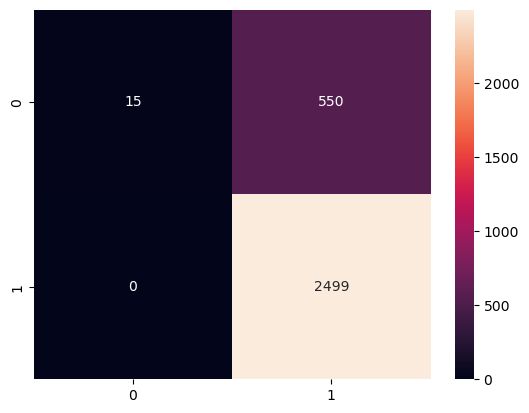

In [77]:
# Naive Baise Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

y_pred_train = nb_classifier.predict(X_train_tfidf)

cm = confusion_matrix(y_train, y_pred_train)
print(cm)

sns.heatmap(cm, annot=True, fmt='d')
# checking on train before we do the test.
# we are predicting on the train just to see predictive model training metrics

In [78]:
# Make predictions on the test dataset
y_pred_test = nb_classifier.predict(X_test_tfidf)

# Calculate accuracy
print(metrics.accuracy_score(y_test, y_pred_test))

0.8199608610567515


In [79]:
# Calculate null accuracy:  accuracy that could be achieved by always predicting the most frequent class
# We must always compare with this in a classification experiment
y_test_binary = np.where(y_test==5, 1, 0)
y_test_binary.mean()

0.8199608610567515

> Not enough cleaning and preping was done to the data so its not going to beat our baseline ^

## PART 9: USING TF-IDF TO SUMMARIZE A YELP REVIEW

[TfidfVectorizer documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

In [80]:
# Create a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(df_yelp.text)  # document-term matrix
features = vect.get_feature_names_out()
dtm.shape

(10000, 28880)

In [81]:
def summarize(df_yelp):
    # Choose a random review that is at least 300 characters
    review_length = 0
    while review_length < 300:
        review_id = np.random.randint(0, len(df_yelp))
        review_text = ""
        review_length = 0
        
        if cur_version >= req_version:
            review_text = df_yelp.text[review_id]
            review_length = len(review_text)
        else:
            # Python version 2.7
            review_text = unicode(df_yelp.text[review_id], 'utf-8')
            review_length = len(review_text)

    # Create a dictionary of words and their TF-IDF scores
    word_scores = {}
    features_list = list(features)  # convert to a list, since it supports the index() method
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features_list:
            word_scores[word] = dtm[review_id, features_list.index(word)]  # find the index of the word in the list
    
    # Print words with the top 5 TF-IDF scores
    print('TOP SCORING WORDS:')
    top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print(f'{word}')
    
    # Print 5 random words
    print('\nRANDOM WORDS:')
    
    if cur_version >= req_version:
        random_words = np.random.choice(list(word_scores.keys()), size=5, replace=False)
    else:
        random_words = np.random.choice(word_scores.keys(), size=5, replace=False)
        
    for word in random_words:
        print(word)
    
    # Print the review
    print(f'\nTHE REVIEW\n{review_text}')

In [82]:
summarize(df_yelp)

TOP SCORING WORDS:
fraction
retail
item
dewalt
makita

RANDOM WORDS:
kick
open
owners
happy
messy

THE REVIEW
If you want a deal for your buck, this is the place to go! You'll find Dewalt, Makita, Oster, Cuisinart, Farberware, Keurig, and many other banded items for a fraction of the original retail price. Yes, some items will be out the package, missing a manual, or may have a scratch or a dent but I rather pay a fraction of the price versus paying full retail at a department store. I rather save money and get a ridiculous deal for the same exact item I would have paid 10X more at a well organized and clean shop. From what I know this store has been open for nearly ten years; the owners are one of the nicest people I've met; they even offer free delivery with the furniture or any other large item you purchase. Stop by!! You'll get a kick from just walking down the unorganized, messy aisles; but once you get to the register to pay- you'll be happy!! "Get more for less!"


## PART 10: SENTIMENT ANALYSIS

[Naive Bayes and Sentiment
Classification](https://web.stanford.edu/~jurafsky/slp3/4.pdf)



In [83]:
print(review)  # review is a TextBlob

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [84]:
# Polarity ranges from -1 (most negative) to 1 (most positive)
review.sentiment.polarity

0.40246913580246907

In [85]:
df_yelp.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')

In [86]:
# understanding the apply method
df_yelp['length'] = df_yelp.text.apply(len)
df_yelp.head(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,895
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1349
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76


In [87]:
# Define a function that accepts text and returns the polarity
def detect_sentiment(text):
    blob = None
    if cur_version >= req_version:
        blob = TextBlob(text).sentiment.polarity
    else:
        blob = TextBlob(text.decode('utf-8')).sentiment.polarity
    return blob

In [88]:
# Create a new DataFrame column for sentiment
df_yelp['sentiment'] = df_yelp.text.apply(detect_sentiment)
df_yelp.head(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,sentiment
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,895,0.402469
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1349,0.229773
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76,0.566667


In [89]:
df_yelp.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny', 'length', 'sentiment'],
      dtype='object')

<Axes: title={'center': 'sentiment'}, xlabel='stars'>

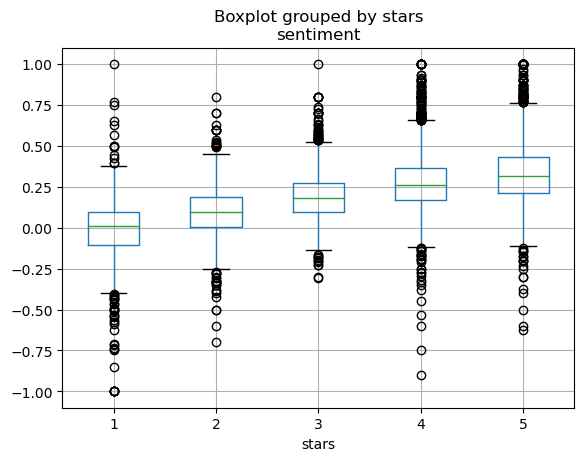

In [90]:
%matplotlib inline

# Boxplot of sentiment grouped by stars
df_yelp.boxplot(column='sentiment', by='stars')

In [91]:
# Reviews with most positive sentiment
df_yelp[df_yelp.sentiment == 1].text.head()

254    Our server Gary was awesome. Food was amazing....
347    3 syllables for this place. \r\nA-MAZ-ING!\r\n...
420                                    LOVE the food!!!!
459    Love it!!! Wish we still lived in Arizona as C...
679                                     Excellent burger
Name: text, dtype: object

In [92]:
# Reviews with most negative sentiment
df_yelp[df_yelp.sentiment == -1].text.head()

773     This was absolutely horrible. I got the suprem...
1517                  Nasty workers and over priced trash
3266    Absolutely awful... these guys have NO idea wh...
4766                                       Very bad food!
5812        I wouldn't send my worst enemy to this place.
Name: text, dtype: object

In [93]:
# Widen the column display
pd.set_option('max_colwidth', 500)

In [94]:
# Negative sentiment in a 5-star review
# this is an outlier
# this is a misclassification
df_yelp[(df_yelp.stars == 5) & (df_yelp.sentiment < -0.3)].head()
# The model cant identify the context of the text. it interprets it as negative but its really not.

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,sentiment
390,106JT5p8e8Chtd0CZpcARw,2009-08-06,KowGVoP_gygzdSu6Mt3zKQ,5,"RIP AZ Coffee Connection. :( I stopped by two days ago unaware that they had closed. I am severely bummed. This place is irreplaceable! Damn you, Starbucks and McDonalds!",review,jKeaOrPyJ-dI9SNeVqrbww,1,0,0,175,-0.302083
1287,57-dgZzOnLox6eudArRKgw,2008-08-28,sksXE8krD3WvqSOhtlSUyQ,5,"Obsessed. Like, I've-got-the-Twangy-Tart-withdrawal-shakes level of addiction to this place. Please make one in Arcadia! Pleeeaaassse.",review,gEnU4BqTK-4abqYl_Ljjfg,3,3,5,134,-0.625000
3075,PwtYeGu-19v9bU4nbP9UbA,2011-12-05,8yfOlQGxQlCgQL9TnnzQkw,5,Unfortunately Out of Business.,review,0fOPM1H03gF5EJooYvkL1Q,0,2,0,30,-0.500000
3516,Bc4DoKgrKCtCuN-0O5He3A,2009-12-19,-qqrl4101KbQKIdar1lMRw,5,"Cashew brittle, almond brittle, bacon brittle! Go now, before it's too late!",review,wHg1YkCzdZq9WBJOTRgxHQ,9,8,6,77,-0.375000
6726,FURgKkRFtMK5yKbjYZVVwA,2012-08-13,8xx8i94sKvBhWZv8ZVyfBA,5,"Brown bag chicken sammich, mac n cheese, fried okra, and the bourbon drink. Nuff said.",review,hFP7Si9jvdOUmmMesg4ghw,0,0,0,87,-0.600000


In [95]:
# Positive sentiment in a 1-star review
df_yelp[(df_yelp.stars == 1) & (df_yelp.sentiment > 0.5)].head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,sentiment
1781,53YGfwmbW73JhFiemNeyzQ,2012-06-22,Gi-4O3EhE175vujbFGDIew,1,If you like the stuck up Scottsdale vibe this is a good place for you. The food isn't impressive. Nice outdoor seating.,review,Hqgx3IdJAAaoQjvrUnbNvw,0,1,2,119,0.766667
2353,3Srfy_VeCgwDbo4iyUFOtw,2006-08-23,K8tXedC2NMBEZ8p77zg23Q,1,"My co-workers and I refer to this place as ""Pizza n' Ants"". The staff will be happy to serve you with bare hands, right after using the till. Also, as the nickname suggests, there has been a noticable insect problem. \r\n\r\n\r\n\r\nAs if that could all be overlooked, the pizza isn't even good. If you are in this part of town, go to Z Pizza or Slices for great pizza instead!",review,rPGZttaVjRoVi3GYbs62cg,0,1,0,372,0.567143
5257,cXx-fHY11Se8rFHkkUeaUg,2009-10-27,2yHyr0N_XNZggmIfZ7JaHw,1,"Remember how I said that the Trivia was the best thing about this place? Well, they got rid of long time Triva host, Dave (who had been featured in the College Times and was the best thing about the trivia). Without Dave's personality, this place just doesn't cut it. Will never go here again. Bummer.",review,nx2PS25Qe3MCEFUdO_XOtw,2,4,0,304,0.650000
6222,fDZzCjlxaA4OOmnFO-i0vw,2012-07-09,F5aRE4oqmHthiHudmnShLQ,1,"My mother always told me, if I didn't have anything nice to say, say nothing!",review,J92bzxYVmyoLHULzh9xNCA,1,2,1,77,0.750000
6702,77oW-QeIXbUoTbUbrdD2aA,2012-01-05,oVYk9Gxa3TY63FAeoeCEzg,1,Most livable city my eye!\r\nPlastic yuppies around every corner looking for a reason to belong. I can't wait for the homosexuals to take control of this dog park and give it some class.\r\n\r\nAvoid at all cost.,review,ek4GWXatDshMorJwGC2JAw,1,2,4,207,0.625000


In [96]:
# Reset the column display width
pd.reset_option('max_colwidth')

## PART 11: ADDING FEATURES TO A DOCUMENT-TERM MATRIX

In [97]:
# Create a new DataFrame that only contains the 5-star and 1-star reviews
df_yelp_best_worst = df_yelp[(df_yelp.stars==5) | (df_yelp.stars==1)]

# Split the new DataFrame into training and testing sets
feature_cols = ['text', 'sentiment', 'cool', 'useful', 'funny']
X = df_yelp_best_worst[feature_cols]
y = df_yelp_best_worst.stars
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [98]:
print(X_train.shape)
X_train.head()

(3064, 5)


,text,sentiment,cool,useful,funny
6841,FILLY-B's!!!!! only 8 reviews?? NINE now!!!\r...,0.197778,0,0,1
1728,My husband and I absolutely LOVE this restaura...,0.412500,0,0,0
3853,We went today after lunch. I got my usual of l...,0.398148,0,0,0
671,Totally dissapointed. I had purchased a coupo...,0.129219,0,0,0
4920,Costco Travel - My husband and I recently retu...,0.473611,0,0,0


In [99]:
# Use CountVectorizer with text column only
vect = CountVectorizer()
train_dtm = vect.fit_transform(X_train.iloc[:, 0])
test_dtm = vect.transform(X_test.iloc[:, 0])
print(train_dtm.shape)

(3064, 16825)


In [100]:
X_train.iloc[:, 1:].head()

,sentiment,cool,useful,funny
6841,0.197778,0,0,1
1728,0.412500,0,0,0
3853,0.398148,0,0,0
671,0.129219,0,0,0
4920,0.473611,0,0,0


In [101]:
# Cast other feature columns to float and convert from a DataFrame to a sparse matrix
extra = sp.sparse.csr_matrix(X_train.iloc[:, 1:].astype(float))
extra.shape


(3064, 4)

In [102]:
extra

<3064x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6755 stored elements in Compressed Sparse Row format>

In [103]:
# Combine sparse matrices - stack the sparse matrices horizontally (column wise)
train_dtm_extra = sp.sparse.hstack((train_dtm, extra))
train_dtm_extra.shape

(3064, 16829)

In [104]:
# Repeat for testing set
extra = sp.sparse.csr_matrix(X_test.iloc[:, 1:].astype(float))
test_dtm_extra = sp.sparse.hstack((test_dtm, extra))
test_dtm_extra.shape

(1022, 16829)

In [105]:
# Use logistic regression with text column only to predict the number of stars assigned to the review
logreg = LogisticRegression(C=1e9)
logreg.fit(train_dtm, y_train)
y_pred = logreg.predict(test_dtm)
print(metrics.accuracy_score(y_test, y_pred))

0.9246575342465754


In [106]:
# Use logistic regression with all features
logreg = LogisticRegression(C=1e9)
logreg.fit(train_dtm_extra, y_train)
y_pred = logreg.predict(test_dtm_extra)
print(metrics.accuracy_score(y_test, y_pred))

0.9207436399217221


## PART 12: SAVE AND LOAD YOUR MODEL

In [107]:
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize

### Save your model

In [108]:
try:
    import cPickle as pickle
except ImportError:
    import pickle

# Create a new DataFrame that only contains the 5-star and 1-star reviews
df_yelp_best_worst = df_yelp[(df_yelp.stars==5) | (df_yelp.stars==1)]

# Split the new DataFrame into training and testing sets
feature_cols = ['text']
X = df_yelp_best_worst[feature_cols]
y = df_yelp_best_worst.stars
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Use CountVectorizer with text column only
vect = CountVectorizer()
train_dtm = vect.fit_transform(X_train.iloc[:, 0])
test_dtm = vect.transform(X_test.iloc[:, 0])

# Use logistic regression with text column only
logreg = LogisticRegression(C=1e9)
logreg.fit(train_dtm, y_train)
y_pred = logreg.predict(test_dtm)
print(metrics.accuracy_score(y_test, y_pred))

## Dump the Logistic Regression Model into a pickle file
out_s = open('yelp_nlp_logreg.pkl', 'wb')
pickle.dump(logreg, out_s)
out_s.close()

## Save vocabulary
ngram_size = 1
vectorizer = CountVectorizer(ngram_range=(ngram_size, ngram_size), min_df=1)
vect = vectorizer.fit(X_train.iloc[:, 0])

dictionary_filepath = 'yelp_nlp_vocabulary.pkl'
pickle.dump(vect.vocabulary_, open(dictionary_filepath, 'wb'))

0.9246575342465754


### Load your model

In [109]:
try:
    import cPickle as pickle
except ImportError:
    import pickle
    
def classify_with_logreg_model(review):
    ## TESTING WITH LOGISTIC REGRESSION & BAG-OF-WORDS
    dictionary_filepath = 'yelp_nlp_vocabulary.pkl'
    model_filepath = 'yelp_nlp_logreg.pkl'

    # LOAD VOCABULARY
    vocabulary_to_load = pickle.load(open(dictionary_filepath, 'rb'))
    loaded_vectorizer = CountVectorizer(ngram_range=(ngram_size, ngram_size), min_df=1, vocabulary=vocabulary_to_load)
    loaded_vectorizer._validate_vocabulary()

    ## LOAD THE SAVED CLASSIFIER
    in_logreg = open(model_filepath, 'rb')
    classifier = pickle.load(in_logreg)
    in_logreg.close()
    
    review_counts = loaded_vectorizer.fit_transform([review]).toarray()
    predictions = classifier.predict(review_counts)
    return predictions

In [110]:
df_yelp_best_worst.text[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\r\n\r\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\r\n\r\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\r\n\r\nAnyway, I can\'t wait to go back!'

In [111]:
df_yelp_best_worst.text[35]

"I've eaten here many times, but none as bad as last night.\r\nService was excellent, and highly attentive.\r\nFood, absolutely horrible.\r\n\r\nMy expectation was they would serve a steak on par with their seafood. After all, they were charging 39 bucks for a ribeye. \r\nWhat I was hoping for was a 1- 1-1/2' thick steak, cooked Pittsburgh style as I had ordered. \r\nWhat I got a a 3/4 in thick piece of meat that was mostly fat, gristle, and in no way resembled Pittsburgh Style. \r\nSalad, similar to something you could get at Chick Filet\r\nVeggies, blah.\r\nBread basket, ample, but day old, and if not, it certainly wasn't fresh. \r\n\r\nIn addition to bad food, we were crammed into a small room where we were nuts to butts with 6 other tables, listening to conversations ranging from someone's recent bout with pinkeye, and another couple who elected to speak entirely in French, until the waiter showed up, then it was like they turned off the French switch and suddenly began speaking En

In [112]:
print(classify_with_logreg_model(df_yelp_best_worst.text[0]))
print(classify_with_logreg_model(df_yelp_best_worst.text[35]))

[5]
[1]


In [113]:
some_text = "Addison Londoner is crazy fun during soccer matches... but not so awful for everyday lunches"
classify_with_logreg_model(some_text)

array([1])

## PART 13: FUN TEXTBLOB FEATURES

In [114]:
# Spelling correction
TextBlob('15 minuets late').correct()

TextBlob("15 minutes late")

In [115]:
# Spellcheck
Word('parot').spellcheck()

[('part', 0.9929478138222849), ('parrot', 0.007052186177715092)]

In [116]:
# Definitions
Word('bank').define('v')

['tip laterally',
 'enclose with a bank',
 'do business with a bank or keep an account at a bank',
 'act as the banker in a game or in gambling',
 'be in the banking business',
 'put into a bank account',
 'cover with ashes so to control the rate of burning',
 'have confidence or faith in']

In [117]:
# ! pip install spacy

In [118]:
import spacy

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load("en_core_web_sm")

ModuleNotFoundError: No module named 'spacy'

In [ ]:
doc = nlp(df_yelp_best_worst.text[35])

# Analyze syntax
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, entity.label_)